In [12]:
import sys, os
import numpy as np

In [13]:
traj = np.load('traj_lambda1.00.npz')['arr_0'].item()['trajectory']
print traj

[[0, 123.05888239928177, 1, 0, [[151], [116, 70]]], [1, 123.05888239928177, 0, 0, [[151], [116, 70]]], [2, 121.82787882377312, 1, 0, [[151], [116, 71]]], [3, 120.77903552977511, 1, 0, [[151], [117, 71]]], [4, 120.77903552977511, 0, 0, [[151], [117, 71]]], [5, 120.77903552977511, 0, 0, [[151], [117, 71]]], [6, 120.77903552977511, 0, 0, [[151], [117, 71]]], [7, 120.77903552977511, 1, 0, [[151], [117, 71]]], [8, 120.77903552977511, 1, 0, [[151], [117, 71]]], [9, 120.77903552977511, 0, 0, [[151], [117, 71]]], [10, 120.77903552977511, 1, 0, [[151], [117, 71]]], [11, 120.77903552977511, 0, 0, [[151], [117, 71]]], [12, 120.77903552977511, 1, 0, [[151], [117, 71]]], [13, 119.78168554130977, 1, 0, [[151], [118, 71]]], [14, 119.78168554130977, 1, 0, [[151], [118, 71]]], [15, 118.83382931056525, 1, 0, [[151], [119, 71]]], [16, 118.83382931056525, 0, 0, [[151], [119, 71]]], [17, 118.83382931056525, 0, 0, [[151], [119, 71]]], [18, 115.12120324354086, 1, 0, [[152], [119, 71]]], [19, 115.121203243540

In [14]:
allowed_sigma_J = np.load('traj_lambda1.00.npz')['arr_0'].item()['allowed_sigma'][0]
allowed_sigma_noe = np.load('traj_lambda1.00.npz')['arr_0'].item()['allowed_sigma'][1]
allowed_gamma = np.load('traj_lambda1.00.npz')['arr_0'].item()['allowed_gamma']
print allowed_sigma_J, allowed_sigma_noe, allowed_gamma





[  0.05         0.051        0.05202      0.0530604    0.05412161
   0.05520404   0.05630812   0.05743428   0.05858297   0.05975463
   0.06094972   0.06216872   0.06341209   0.06468033   0.06597394
   0.06729342   0.06863929   0.07001207   0.07141231   0.07284056
   0.07429737   0.07578332   0.07729898   0.07884496   0.08042186
   0.0820303    0.08367091   0.08534432   0.08705121   0.08879223
   0.09056808   0.09237944   0.09422703   0.09611157   0.0980338
   0.09999448   0.10199437   0.10403425   0.10611494   0.10823724
   0.11040198   0.11261002   0.11486222   0.11715947   0.11950266
   0.12189271   0.12433056   0.12681718   0.12935352   0.13194059
   0.1345794    0.13727099   0.14001641   0.14281674   0.14567307
   0.14858653   0.15155826   0.15458943   0.15768122   0.16083484
   0.16405154   0.16733257   0.17067922   0.17409281   0.17757466
   0.18112616   0.18474868   0.18844365   0.19221253   0.19605678
   0.19997791   0.20397747   0.20805702   0.21221816   0.21646252
   0.220791

In [15]:
sampled_sigma_J = []
sampled_sigma_noe = []
sampled_gamma = []
# append sampled nuisance paramters, this part is hard coded now, will be fixed in the future
for i in range(len(traj)):
    sampled_sigma_J.append(allowed_sigma_J[traj[i][4][0][0]])
    sampled_sigma_noe.append(allowed_sigma_noe[traj[i][4][1][0]])
    sampled_gamma.append(allowed_gamma[traj[i][4][1][1]])

time = np.arange(1,len(sampled_sigma_J)+0.1,1)


    

plotting figures...


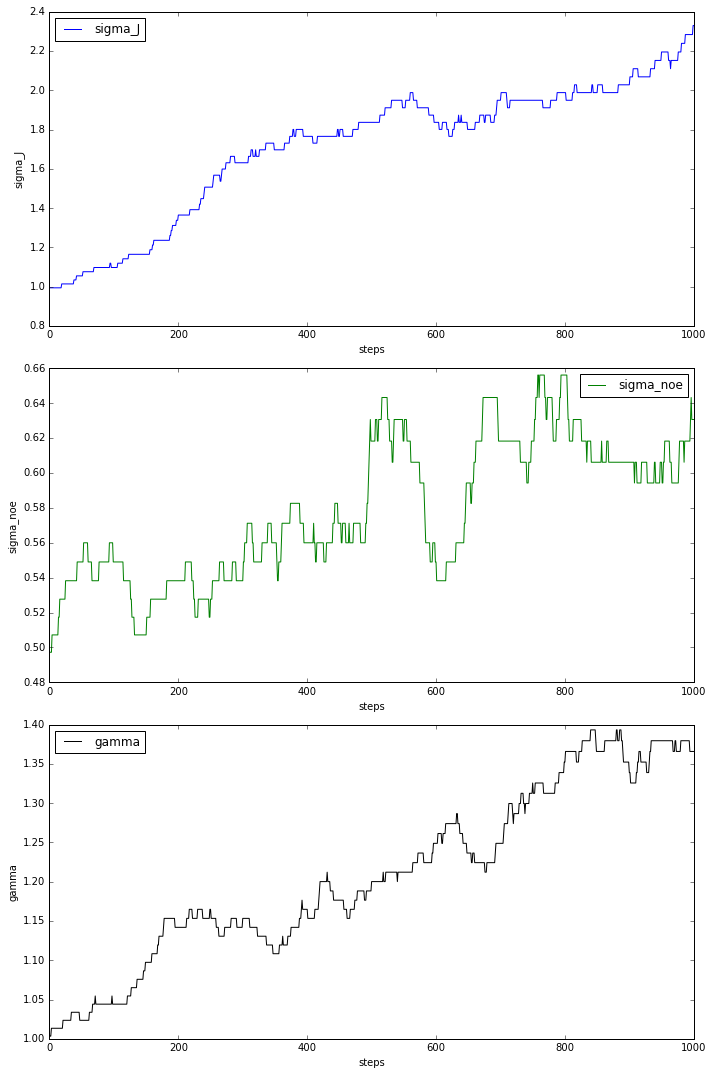

In [16]:
print "plotting figures..."
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(time,sampled_sigma_J,label='sigma_J',color='blue')
plt.xlabel('steps')
plt.ylabel('sigma_J')
plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(time,sampled_sigma_noe,label='sigma_noe',color='green')
plt.xlabel('steps')
plt.ylabel('sigma_noe')
plt.legend(loc='best')
plt.subplot(3,1,3)
plt.plot(time,sampled_gamma,label='gamma',color='black')
plt.xlabel('steps')
plt.ylabel('gamma')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('sampled_parameters.pdf')
plt.show()

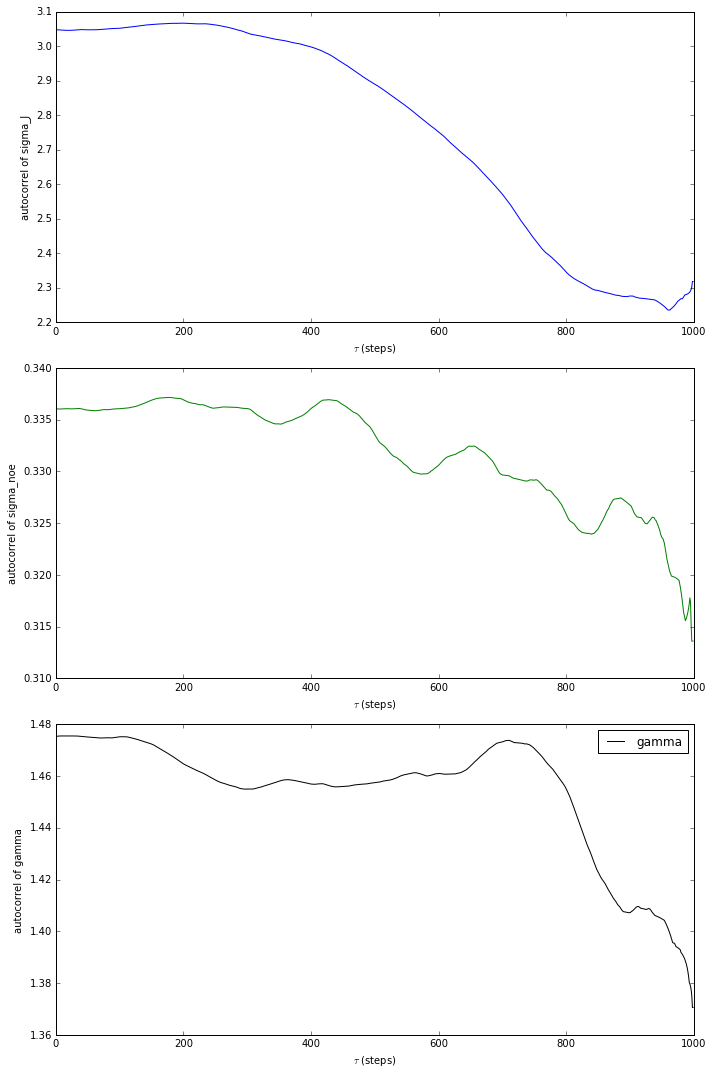

In [17]:
# compute auto-correlation
def autocorr(x):
    tau = x.size
    g = np.correlate(x, x, mode='full')[tau:]
    n = np.arange(tau-1,0,-1)
    return g/n

ac_sigma_J =  autocorr( np.array(sampled_sigma_J) )
ac_sigma_noe =  autocorr( np.array(sampled_sigma_noe) )
ac_gamma =  autocorr( np.array(sampled_gamma) )

time_in_steps = np.arange(1,len(ac_sigma_J)+1,1)

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(time_in_steps, ac_sigma_J, label='sigma_J', color='blue')
plt.xlabel(r'$\tau$ (steps)')
plt.ylabel('autocorrel of sigma_J')
plt.subplot(3,1,2)
plt.plot(time_in_steps, ac_sigma_noe,label='sigma_noe', color='green')
plt.xlabel(r'$\tau$ (steps)')
plt.ylabel('autocorrel of sigma_noe')
plt.subplot(3,1,3)
plt.plot(time_in_steps, ac_gamma, label='gamma',color='black')
plt.xlabel(r'$\tau$ (steps)')
plt.ylabel('autocorrel of gamma')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('autocorrelation.pdf')
plt.show()

999


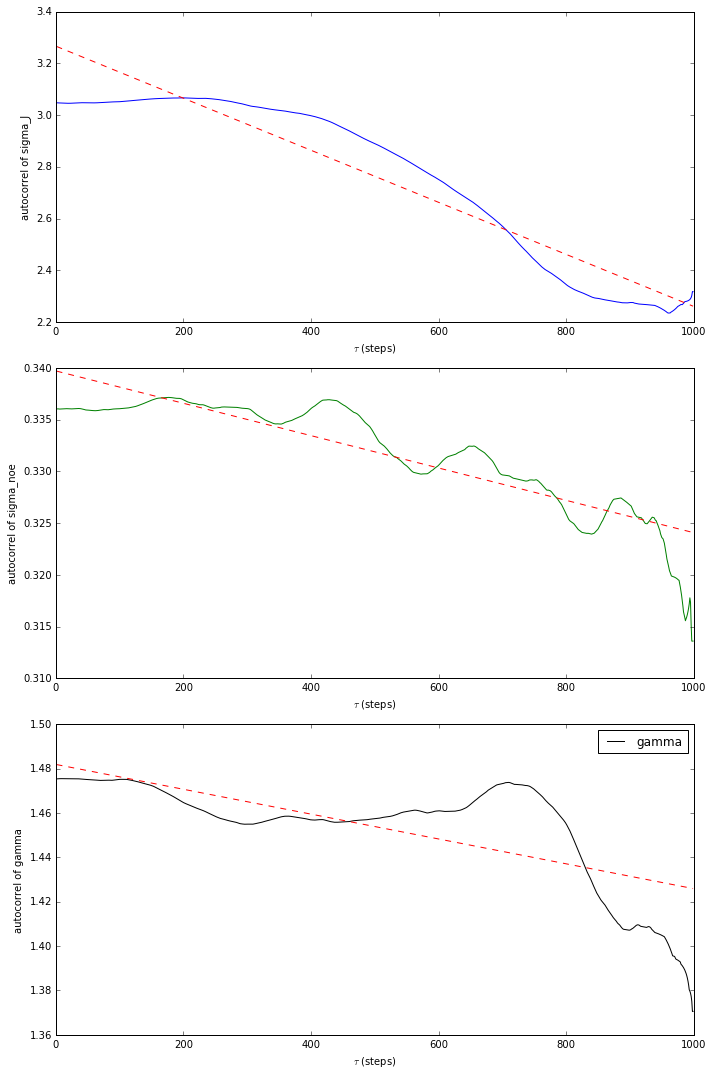

In [25]:
from scipy.optimize import curve_fit

def single_exp_decay(x, a0,a1, tau1):
    return a0+a1*np.exp(-(x/tau1))

v0_sigma_J = [0.1, 0.5,40.]  # Initial guess [a0, a1,a2, tau1, tau2] for a0 + a1*exp(-(x/tau1)) + a2*exp(-(x/tau2))
popt_sigma_J, pcov_sigma_J = curve_fit(single_exp_decay, time_in_steps, ac_sigma_J, p0=v0_sigma_J, maxfev=10000)  # ignore last bin, which has 0 counts
yFit_data_sigma_J = single_exp_decay(time_in_steps, popt_sigma_J[0], popt_sigma_J[1],popt_sigma_J[2])
print len(yFit_data_sigma_J)


v0_sigma_noe = [0.1,0.5, 40.]  # Initial guess [a0, a1,a2, tau1, tau2] for a0 + a1*exp(-(x/tau1)) + a2*exp(-(x/tau2))
popt_sigma_noe, pcov_sigma_noe = curve_fit(single_exp_decay, time_in_steps, ac_sigma_noe, p0=v0_sigma_noe, maxfev=10000)  # ignore last bin, which has 0 counts
yFit_data_sigma_noe = single_exp_decay(time_in_steps, popt_sigma_noe[0], popt_sigma_noe[1],popt_sigma_noe[2])

v0_gamma = [0.1,0.5, 40.]  # Initial guess [a0, a1,a2, tau1, tau2] for a0 + a1*exp(-(x/tau1)) + a2*exp(-(x/tau2))
popt_gamma, pcov_gamma = curve_fit(single_exp_decay, time_in_steps, ac_gamma, p0=v0_gamma, maxfev=10000)  # ignore last bin, which has 0 counts
yFit_data_gamma = single_exp_decay(time_in_steps, popt_gamma[0], popt_gamma[1],popt_gamma[2])

from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(time_in_steps, ac_sigma_J, label='sigma_J', color='blue')
plt.plot(time_in_steps,yFit_data_sigma_J,'r--')
plt.xlabel(r'$\tau$ (steps)')
plt.ylabel('autocorrel of sigma_J')
plt.subplot(3,1,2)
plt.plot(time_in_steps, ac_sigma_noe,label='sigma_noe', color='green')
plt.plot(time_in_steps,yFit_data_sigma_noe,'r--')
plt.xlabel(r'$\tau$ (steps)')
plt.ylabel('autocorrel of sigma_noe')
plt.subplot(3,1,3)
plt.plot(time_in_steps, ac_gamma, label='gamma',color='black')
plt.plot(time_in_steps,yFit_data_gamma,'r--')
plt.xlabel(r'$\tau$ (steps)')
plt.ylabel('autocorrel of gamma')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('autocorrelation_curve_fitting.pdf')
plt.show()


